In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

Using TensorFlow backend.


In [3]:
tf.config.list_physical_devices()   # or device_lib.list_local_devices()

[PhysicalDevice(name=u'/physical_device:CPU:0', device_type=u'CPU'),
 PhysicalDevice(name=u'/physical_device:XLA_CPU:0', device_type=u'XLA_CPU'),
 PhysicalDevice(name=u'/physical_device:XLA_GPU:0', device_type=u'XLA_GPU'),
 PhysicalDevice(name=u'/physical_device:XLA_GPU:1', device_type=u'XLA_GPU')]

In [ ]:
# should I run only on XLA_GPU s?

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [ ]:
tf.test.gpu_device_name()  ## ????????

In [4]:
height = 64
width = 128
channel = 3

In [5]:
clean_data=[]
path='/home/evren/classified_data/clean_data/clean_data_15K/'
files=os.listdir(path)
for i in tqdm(files):
    img=cv2.imread(path+'/'+i,1)
    img=cv2.resize(img,(width,height))
    clean_data.append(img_to_array(img))

100%|██████████| 15000/15000 [01:19<00:00, 188.71it/s]


In [ ]:
noisy_15dB=[]
path_15dB='/home/evren/classified_data/noisy_data/15dB/15dB_15K/'
files=os.listdir(path_15dB)
for i in tqdm(files):
    img=cv2.imread(path_15dB+'/'+i,1)
    img=cv2.resize(img,(width,height))
    noisy_15dB.append(img_to_array(img))

In [ ]:
noisy_20dB=[]
path_20dB='/home/evren/classified_data/noisy_data/20dB/20dB_15K/'
files=os.listdir(path_20dB)
for i in tqdm(files):
    img=cv2.imread(path_20dB+'/'+i,1)
    img=cv2.resize(img,(width,height))
    noisy_20dB.append(img_to_array(img))

In [ ]:
noisy_25dB=[]
path_25dB='/home/evren/classified_data/noisy_data/25dB/25dB_15K'
files=os.listdir(path_25dB)
for i in tqdm(files):
    img=cv2.imread(path_25dB+'/'+i,1)
    img=cv2.resize(img,(width,height))
    noisy_25dB.append(img_to_array(img))

In [ ]:
noisy_30dB=[]
path_30dB='/home/evren/classified_data/noisy_data/30dB/30dB_15K'
files=os.listdir(path_30dB)
for i in tqdm(files):
    img=cv2.imread(path_30dB+'/'+i,1)
    img=cv2.resize(img,(width,height))
    noisy_30dB.append(img_to_array(img))


In [6]:
noisy_100dB=[]
path_100dB='/home/evren/classified_data/noisy_data/100dB/100dB_15K'
files=os.listdir(path_100dB)
for i in tqdm(files):
    img=cv2.imread(path_100dB+'/'+i,1)
    img=cv2.resize(img,(width,height))
    noisy_100dB.append(img_to_array(img))

100%|██████████| 15000/15000 [04:15<00:00, 58.63it/s] 


In [7]:
clean_data = np.reshape(clean_data, (len(clean_data), height, width, channel))
clean_data = clean_data.astype('float32') / 255.

In [ ]:
noisy_15dB = np.reshape(noisy_15dB, (len(noisy_15dB), height, width, channel))
noisy_15dB = noisy_15dB.astype('float32') / 255.

In [ ]:
noisy_20dB = np.reshape(noisy_20dB, (len(noisy_20dB), height, width, channel))
noisy_20dB = noisy_20dB.astype('float32') / 255.

In [ ]:
noisy_25dB = np.reshape(noisy_25dB, (len(noisy_25dB), height, width, channel))
noisy_25dB = noisy_25dB.astype('float32') / 255.

In [ ]:
noisy_30dB = np.reshape(noisy_15dB, (len(noisy_30dB), height, width, channel))
noisy_30dB = noisy_30dB.astype('float32') / 255.

In [8]:
noisy_100dB = np.reshape(noisy_100dB, (len(noisy_100dB), height, width, channel))
noisy_100dB = noisy_100dB.astype('float32') / 255.

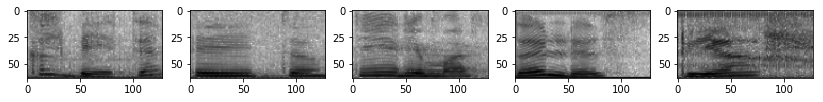

In [9]:
# Displaying clean images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(clean_data[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 15dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_15dB[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 20dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_20dB[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 25dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_25dB[i], cmap='binary')
plt.show()

In [ ]:
# Displaying 30dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_30dB[i], cmap='binary')
plt.show()

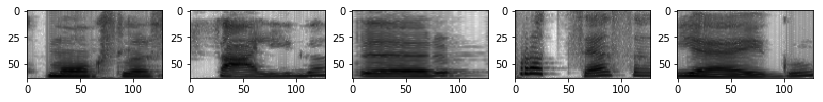

In [10]:
# Displaying 100dB noisy images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(noisy_100dB[i], cmap='binary')
plt.show()

In [11]:
model = Sequential([
    
  # encoder
    Conv2D(128, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    BatchNormalization(),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    Conv2D(8, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    Conv2D(16, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    Conv2D(32, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu    
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 128)      3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 128)      512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 128, 128)      147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 128, 128)      512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 64, 64)        73792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 64, 64)        2

In [13]:
model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy'])

In [15]:
history = model.fit(noisy_100dB, clean_data,
          validation_split=0.2,
          batch_size=512,
          epochs=100)

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
12000/12000 [==============================] - 731s 61ms/sample - loss: 0.0240 - accuracy: 0.5614 - val_loss: 0.0256 - val_accuracy: 0.7025
Epoch 2/100
12000/12000 [==============================] - 728s 61ms/sample - loss: 0.0186 - accuracy: 0.4517 - val_loss: 0.0235 - val_accuracy: 0.8807
Epoch 3/100
12000/12000 [==============================] - 728s 61ms/sample - loss: 0.0175 - accuracy: 0.4509 - val_loss: 0.0226 - val_accuracy: 0.5954
Epoch 4/100
12000/12000 [==============================] - 730s 61ms/sample - loss: 0.0170 - accuracy: 0.3669 - val_loss: 0.0217 - val_accuracy: 0.5113
Epoch 5/100
12000/12000 [==============================] - 699s 58ms/sample - loss: 0.0168 - accuracy: 0.3469 - val_loss: 0.0209 - val_accuracy: 0.2545
Epoch 6/100
12000/12000 [==============================] - 700s 58ms/sample - loss: 0.0167 - accuracy: 0.3430 - val_loss: 0.0208 - val_accuracy: 0.3305
Epoch 7/100
12000/12000 [==============

12000/12000 [==============================] - 698s 58ms/sample - loss: 0.0146 - accuracy: 0.3384 - val_loss: 0.0180 - val_accuracy: 0.3504
Epoch 55/100
12000/12000 [==============================] - 699s 58ms/sample - loss: 0.0144 - accuracy: 0.3384 - val_loss: 0.0182 - val_accuracy: 0.2923
Epoch 56/100
12000/12000 [==============================] - 699s 58ms/sample - loss: 0.0143 - accuracy: 0.3376 - val_loss: 0.0182 - val_accuracy: 0.3185
Epoch 57/100
12000/12000 [==============================] - 699s 58ms/sample - loss: 0.0143 - accuracy: 0.3328 - val_loss: 0.0183 - val_accuracy: 0.3651
Epoch 58/100
12000/12000 [==============================] - 708s 59ms/sample - loss: 0.0142 - accuracy: 0.3423 - val_loss: 0.0184 - val_accuracy: 0.3248
Epoch 59/100
12000/12000 [==============================] - 700s 58ms/sample - loss: 0.0142 - accuracy: 0.3331 - val_loss: 0.0183 - val_accuracy: 0.3160
Epoch 60/100
12000/12000 [==============================] - 698s 58ms/sample - loss: 0.0141 - a

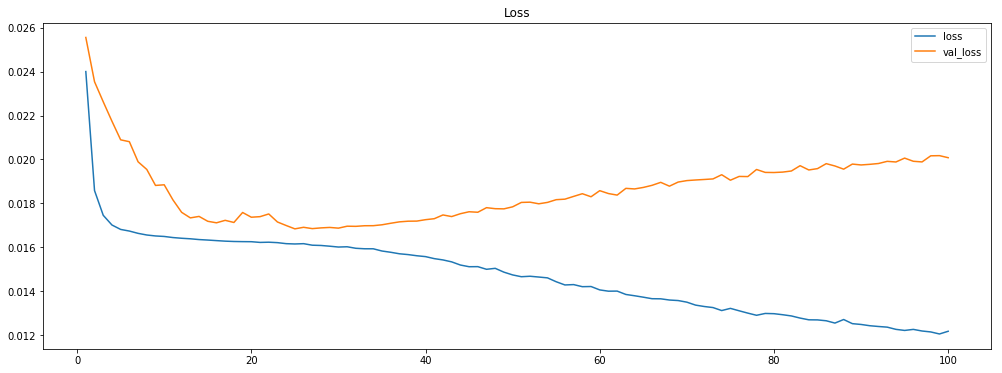

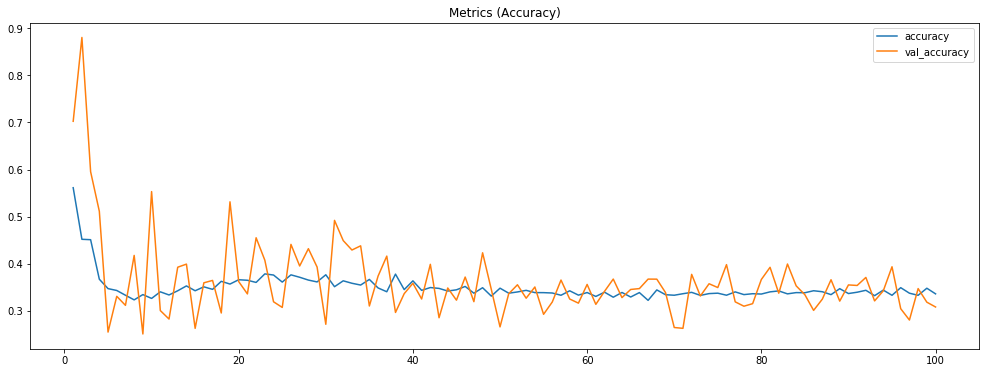

In [16]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()